<h3>Exploratory Data Analysis of Iris dataset</h3>
<h4>Shekhar Pandey</h4>

<b> Exploratory Data Analysis (EDA) </b>
* EDA is an approach to analyze datasets, understand their main characteristics, often with visual methods.
* It is a critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations
* In summary EDA is an approach to guage every nuance from the data at early encounter

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<b> 3 species of Iris flower</b><br>
![Setosa](img/Iris.png)

## Iris Flower dataset
Iris Dataset: [https://en.wikipedia.org/wiki/Iris_flower_data_set]
* A simple dataset to learn the basics.
* 3 flowers of Iris species. 
* 1936 by Ronald Fisher.
* Petal and Sepal: http://terpconnect.umd.edu/~petersd/666/html/iris_with_labels.jpg
*  Objective: Classify a new flower as belonging to one of the 3 classes given the 4 features.

![Petal & Sepal](img/Petal_Sepal.png)

<h4>Load Dataset</h4>

In [3]:
iris = pd.read_csv('./data/iris.csv')

<h4>Q: How many data-points and features?</h4>

In [4]:
print(iris.shape)

(150, 5)


<b>Observations</b>
<p>150 rows (data-points) and 5 columns (features)</p>

<h4>Q: What are the column names in our dataset?</h4>

In [6]:
for x in iris.columns:
    print(x)

sepal_length
sepal_width
petal_length
petal_width
species


* Columns are: Sepal Length, Sepal Width, Petal Length, Petal Width are called feature/Variable/Input-variable/Independent-variable. 
* Species indicate the species type of Iris flower. It is called as called Labels/Dependent-variable/out-variable/class/class-label/Response label

In [42]:
# View first few records
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<ul>
<li><b>Q: How many data points for each class are present?</b></li> 
<li><b>OR How many flowers for each species are present?</b></li>
</ul>


In [7]:
# Approach 1 :
iris.groupby(['species']).size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [8]:
# Approach 2:
iris['species'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

<b>Observations</b>
<p>Iris is a balanced dataset as the number of data points for every class is equal</p>

<h3>Scatter Plot</h3>

In [155]:
iris_setosa = iris.loc[iris['species'] == 'setosa']

iris_virginica = iris.loc[iris['species'] == 'virginica']

iris_versicolor = iris.loc[iris['species'] == 'versicolor']

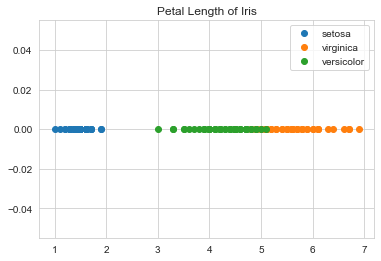

In [44]:
# 1-D scatter plot of petal-length
sns.set_style('whitegrid')

plt.plot(iris_setosa['petal_length'], np.zeros_like(iris_setosa['petal_length']), 'o', label='setosa')
plt.plot(iris_virginica['petal_length'], np.zeros_like(iris_versicolor['petal_length']), 'o', label='virginica')
plt.plot(iris_versicolor['petal_length'], np.zeros_like(iris_virginica['petal_length']), 'o', label='versicolor')
plt.title('Petal Length of Iris')
plt.legend()
plt.show()

Observation:
* Setosa is clearly separable based on Petal Length
* Virginica and Versicolor are overlapping
* 1D Scatter points overlap, so difficult to interpret how much is the overlap

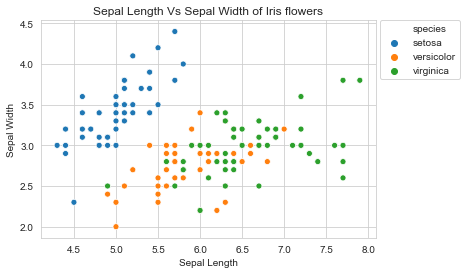

In [45]:
#Sepal Length Vs Sepal width

ax = sns.scatterplot(x = 'sepal_length', y = 'sepal_width', hue = 'species', data = iris)
ax.legend(loc='best', bbox_to_anchor=(1.25, 1), borderaxespad=0.)
ax.set_title('Sepal Length Vs Sepal Width of Iris flowers')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')

plt.show()

<b>Observations</b>
<p>Setosa species Iris flower is clearly separated from other two species.</p>
<p>There is overlap between Versicolor, Virginica</p>

<h3>Pair-plot </h3>

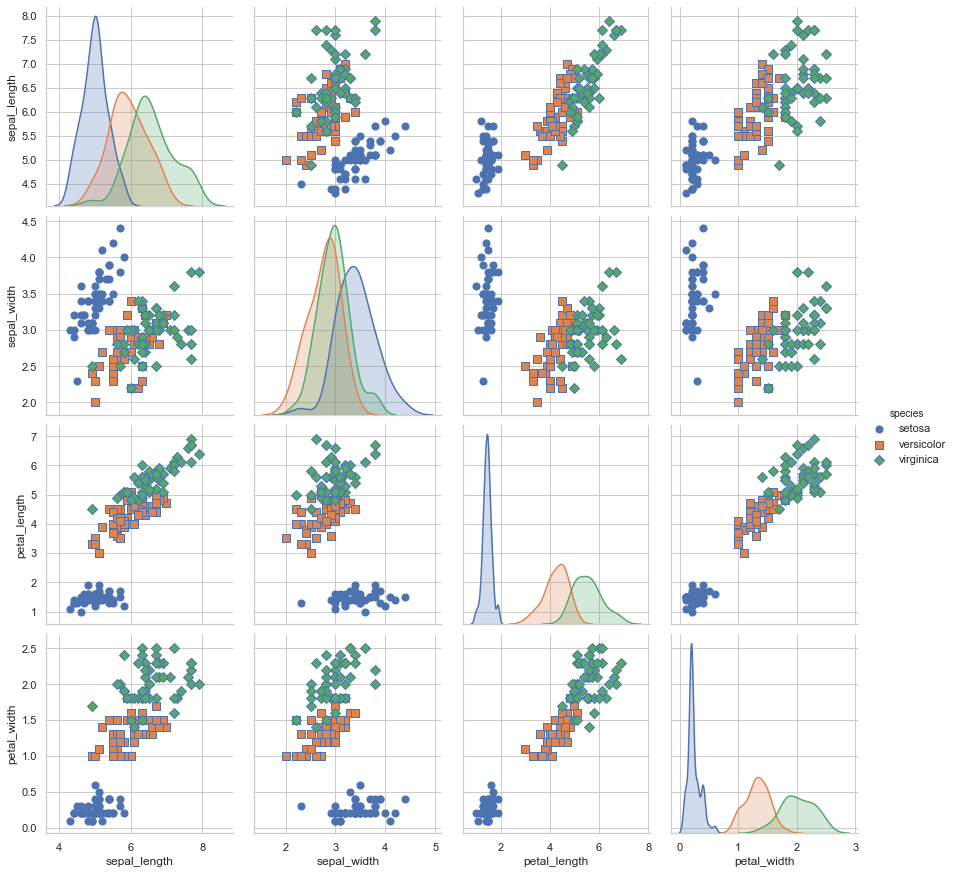

In [57]:
sns.set(style="whitegrid")
g = sns.pairplot(iris, hue="species", markers=["o", "s", "D"], 
                 plot_kws=dict(s=50, edgecolor="b", linewidth=1),
                 height=3)

<b>Observations</b>
<ul>
<li>Setosa species flowers are distinguishable in all charts</li>
<li>Versicolor and Virginica have overlap mostly </li>
<li>Petal Length and Petal Width are the most useful feature to distinguish Iris flowers of different species</li>
</ul>

### Univariate Analysis using Probability Density Function (PDF)
<p>In simple terms, PDF is constructed by drawing a smooth curve fit through the vertically normalized histogram</p>
In most basic form, histogram has bins and frequency of data points corresponding to each bin.
We can calculate probability of each bin by dividing frequency of each bin by total datapoints.
<p>Let’s do univariate ananlysis using PDF to find which feature helps to separate Iris flowers the most</p>

<h3> Histograms and Probability Density Functions (PDF) using KDE</h3>

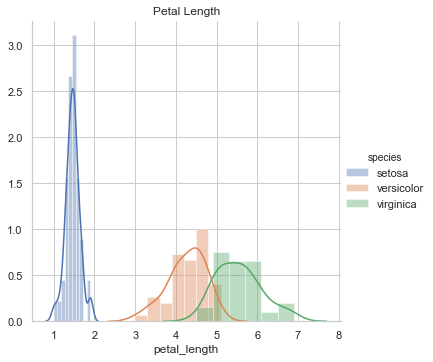

In [69]:
sns.set_style('whitegrid')

sns.FacetGrid(iris, hue='species', height=5) \
   .map(sns.distplot, 'petal_length') \
   .add_legend()

plt.title('Petal Length')
plt.show()

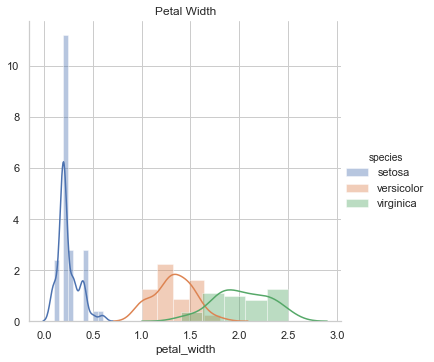

In [70]:
sns.FacetGrid(iris, hue='species', height=5)\
   .map(sns.distplot, 'petal_width') \
   .add_legend()
plt.title('Petal Width')
plt.show()

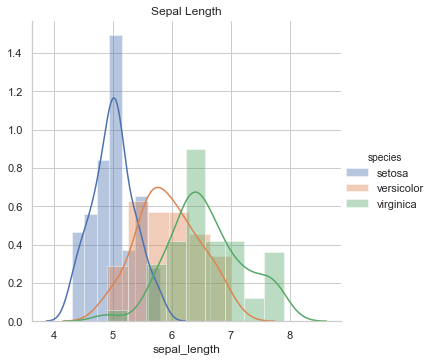

In [71]:
sns.FacetGrid(iris, hue='species', height=5)\
   .map(sns.distplot, 'sepal_length') \
   .add_legend()
plt.title('Sepal Length')
plt.show()

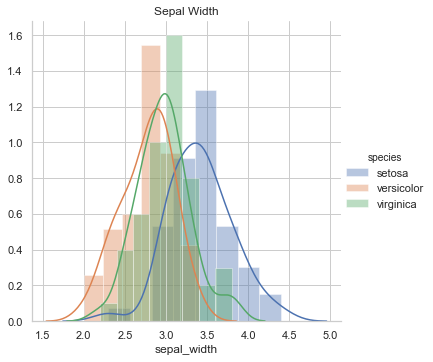

In [72]:
sns.FacetGrid(iris, hue='species', height=5)\
   .map(sns.distplot, 'sepal_width') \
   .add_legend()

plt.title('Sepal Width')
plt.show()

### CDF(Cumulative distribution function)

In [122]:
hist, bin_edges = np.histogram(iris_setosa['petal_length'], bins = 10, density=True)

pdf = hist/sum(hist)

cdf = np.cumsum(pdf)


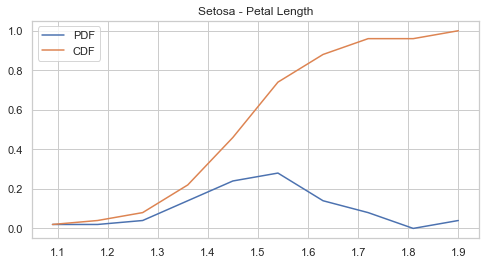

In [127]:
fig, ax = plt.subplots(figsize=(8, 4))

sns.lineplot(x = bin_edges[1:], y = pdf, label='PDF', ax = ax)
sns.lineplot(x = bin_edges[1:], y = cdf, label='CDF', ax = ax)

plt.title('Setosa - Petal Length')
plt.show()

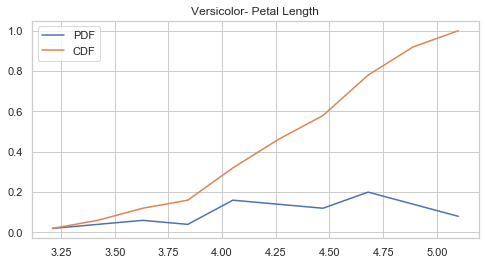

In [132]:
# Versicolor - Petal Length
hist, bin_edges = np.histogram(iris_versicolor['petal_length'], bins = 10, density=True)

pdf = hist/sum(hist)

cdf = np.cumsum(pdf)

fig, ax = plt.subplots(figsize=(8, 4))

sns.lineplot(x = bin_edges[1:], y = pdf, label='PDF', ax = ax)
sns.lineplot(x = bin_edges[1:], y = cdf, label='CDF', ax = ax)

plt.title('Versicolor- Petal Length')
plt.show()

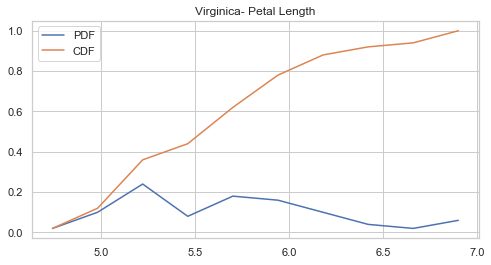

In [133]:
# Virginica - Petal Length
hist, bin_edges = np.histogram(iris_virginica['petal_length'], bins = 10, density=True)

pdf = hist/sum(hist)

cdf = np.cumsum(pdf)

fig, ax = plt.subplots(figsize=(8, 4))

sns.lineplot(x = bin_edges[1:], y = pdf, label='PDF', ax = ax)
sns.lineplot(x = bin_edges[1:], y = cdf, label='CDF', ax = ax)

plt.title('Virginica- Petal Length')
plt.show()

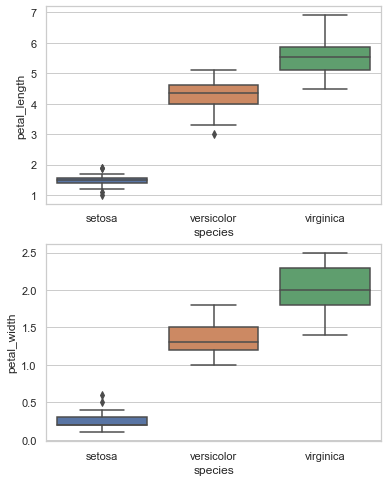

In [145]:
# Boxplot
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(6,8))
sns.boxplot(x='species', y='petal_length', data=iris, ax=ax[0])
sns.boxplot(x='species', y='petal_width', data=iris, ax=ax[1])

plt.show()

In [153]:
# correlation
iris.loc[:, 'sepal_length':'petal_width'].corr(method ='pearson') 

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


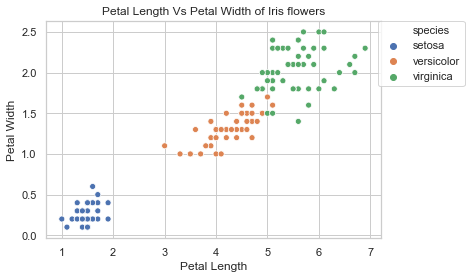

In [154]:
# Petal Length Vs Petal width

ax = sns.scatterplot(x = 'petal_length', y = 'petal_width', hue = 'species', data = iris)
ax.legend(loc='best', bbox_to_anchor=(1.25, 1), borderaxespad=0.)
ax.set_title('Petal Length Vs Petal Width of Iris flowers')
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')

plt.show()